In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train_cleaned_imputed.csv")
data.head()

,Age,Ratings,RestaurantLat,RestaurantLon,DeliveryLocationLat,DeliveryLocationLon,TimeOrderPickedUp,WeatherConditions,RoadTrafficDensity,VehicleCondition,TypeOfOrder,TypeOfVehicle,MultipleDeliveries,Festival,City,TimeTaken,Distance,Day,Hour,OrderPeriod
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.025149,Saturday,11,morning
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.183530,Friday,19,evening
2,23,4.4,12.914264,77.678400,12.924264,77.688400,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.552758,Saturday,8,morning
3,38,4.7,11.003669,76.976494,11.053669,77.026494,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.790401,Tuesday,18,evening
4,32,4.6,12.972793,80.249982,13.012793,80.289982,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.210138,Saturday,13,afternoon


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40353 entries, 0 to 40352
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  40353 non-null  int64  
 1   Ratings              40353 non-null  float64
 2   RestaurantLat        40353 non-null  float64
 3   RestaurantLon        40353 non-null  float64
 4   DeliveryLocationLat  40353 non-null  float64
 5   DeliveryLocationLon  40353 non-null  float64
 6   TimeOrderPickedUp    40353 non-null  object 
 7   WeatherConditions    40353 non-null  object 
 8   RoadTrafficDensity   40353 non-null  object 
 9   VehicleCondition     40353 non-null  int64  
 10  TypeOfOrder          40353 non-null  object 
 11  TypeOfVehicle        40353 non-null  object 
 12  MultipleDeliveries   40353 non-null  int64  
 13  Festival             40353 non-null  object 
 14  City                 40353 non-null  object 
 15  TimeTaken            40353 non-null 

## EDA on Numerical Values

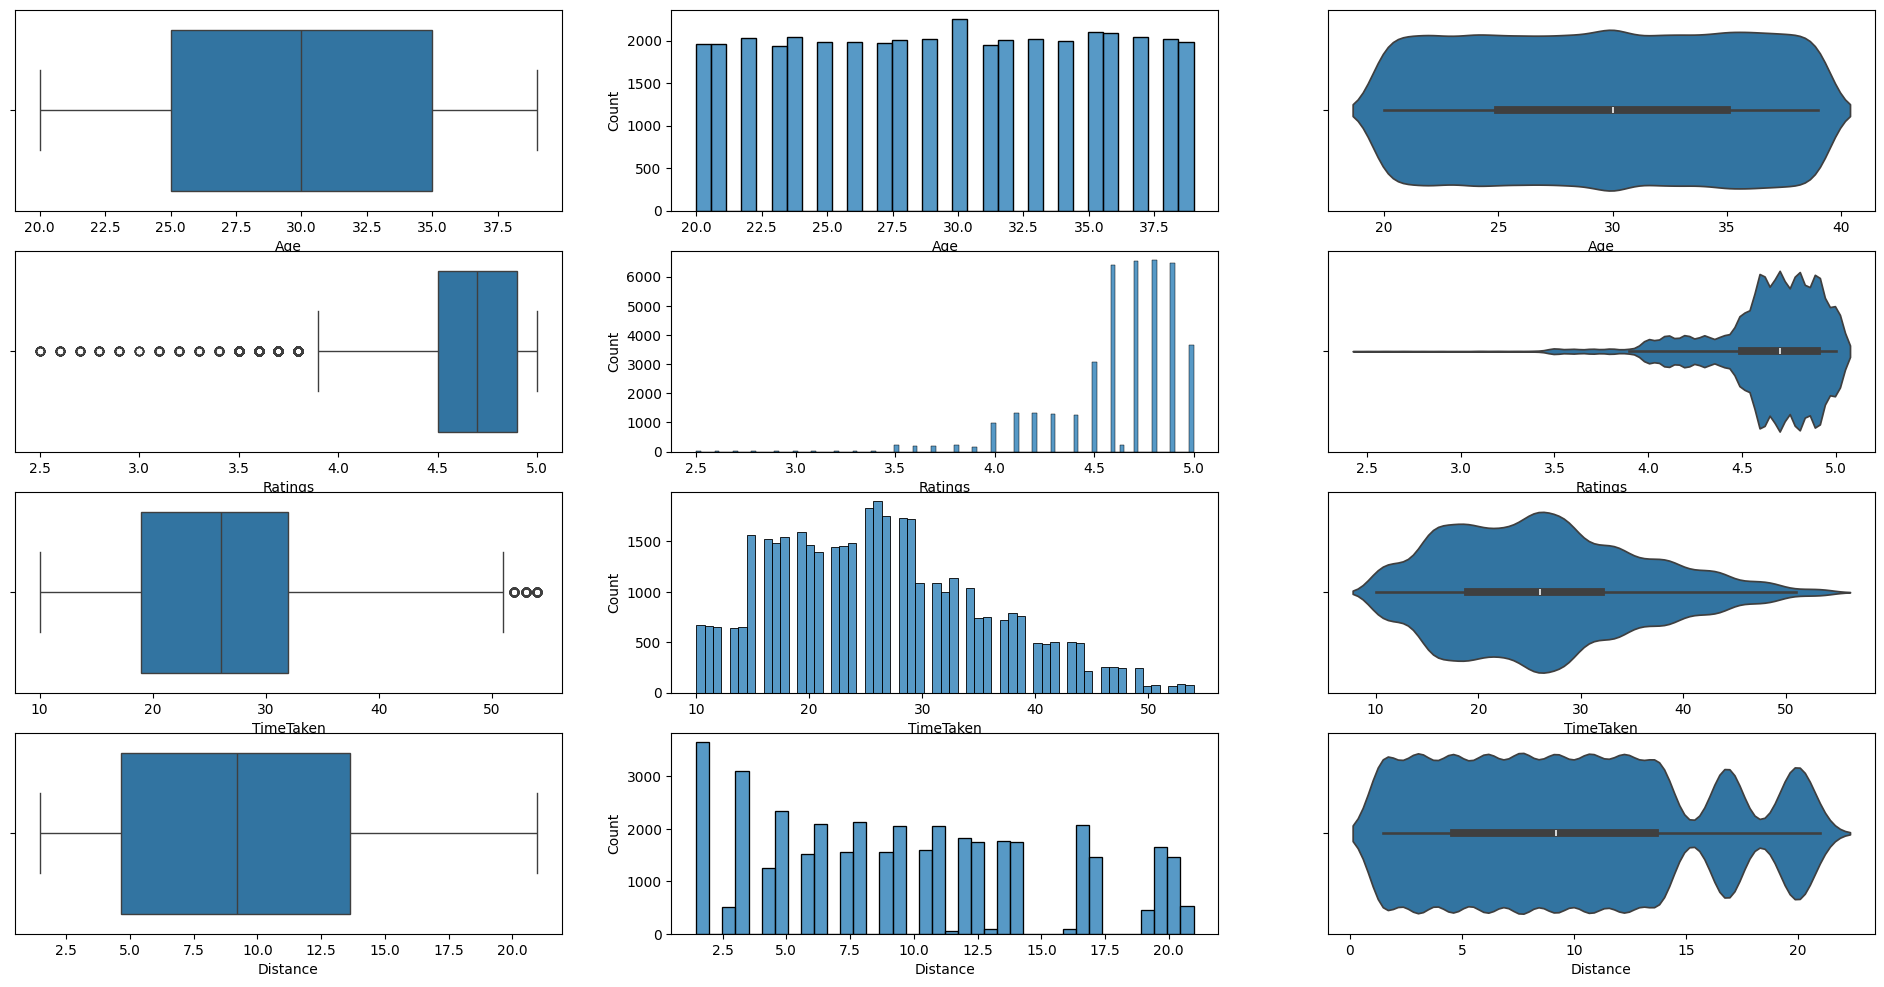

In [4]:
numeric = data[['Age', 'Ratings', 'TimeTaken', 'Distance']]
f, axes = plt.subplots(4, 3, figsize=(24, 12))

count = 0
for var in numeric:
    sb.boxplot(data = numeric[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric[var], ax = axes[count,1])
    sb.violinplot(data = numeric[var], orient = "h", ax = axes[count,2])
    count += 1

We observe that ratings is positively skewed. Therefore we will apply z-score based outlier removal

### Removing outliers using z-score based outlier removal
We will remove the outliers and store it in another dataframe. Then we will compare machine learning results to see if the results improves after removing outerliers

In [5]:
from scipy import stats

data2 = data.copy()
# Assuming 'columns_to_check' is a list of column names you want to check for outliers
columns_to_check = ['TimeTaken', 'Ratings']

# Compute z-scores for the specified columns
z_scores = stats.zscore(data2[columns_to_check])

# Check for outliers based on z-score threshold of 3
outliers_mask = (np.abs(z_scores) < 3).all(axis=1)

# Update the original DataFrame by removing rows with outliers
data2 = data2[outliers_mask]

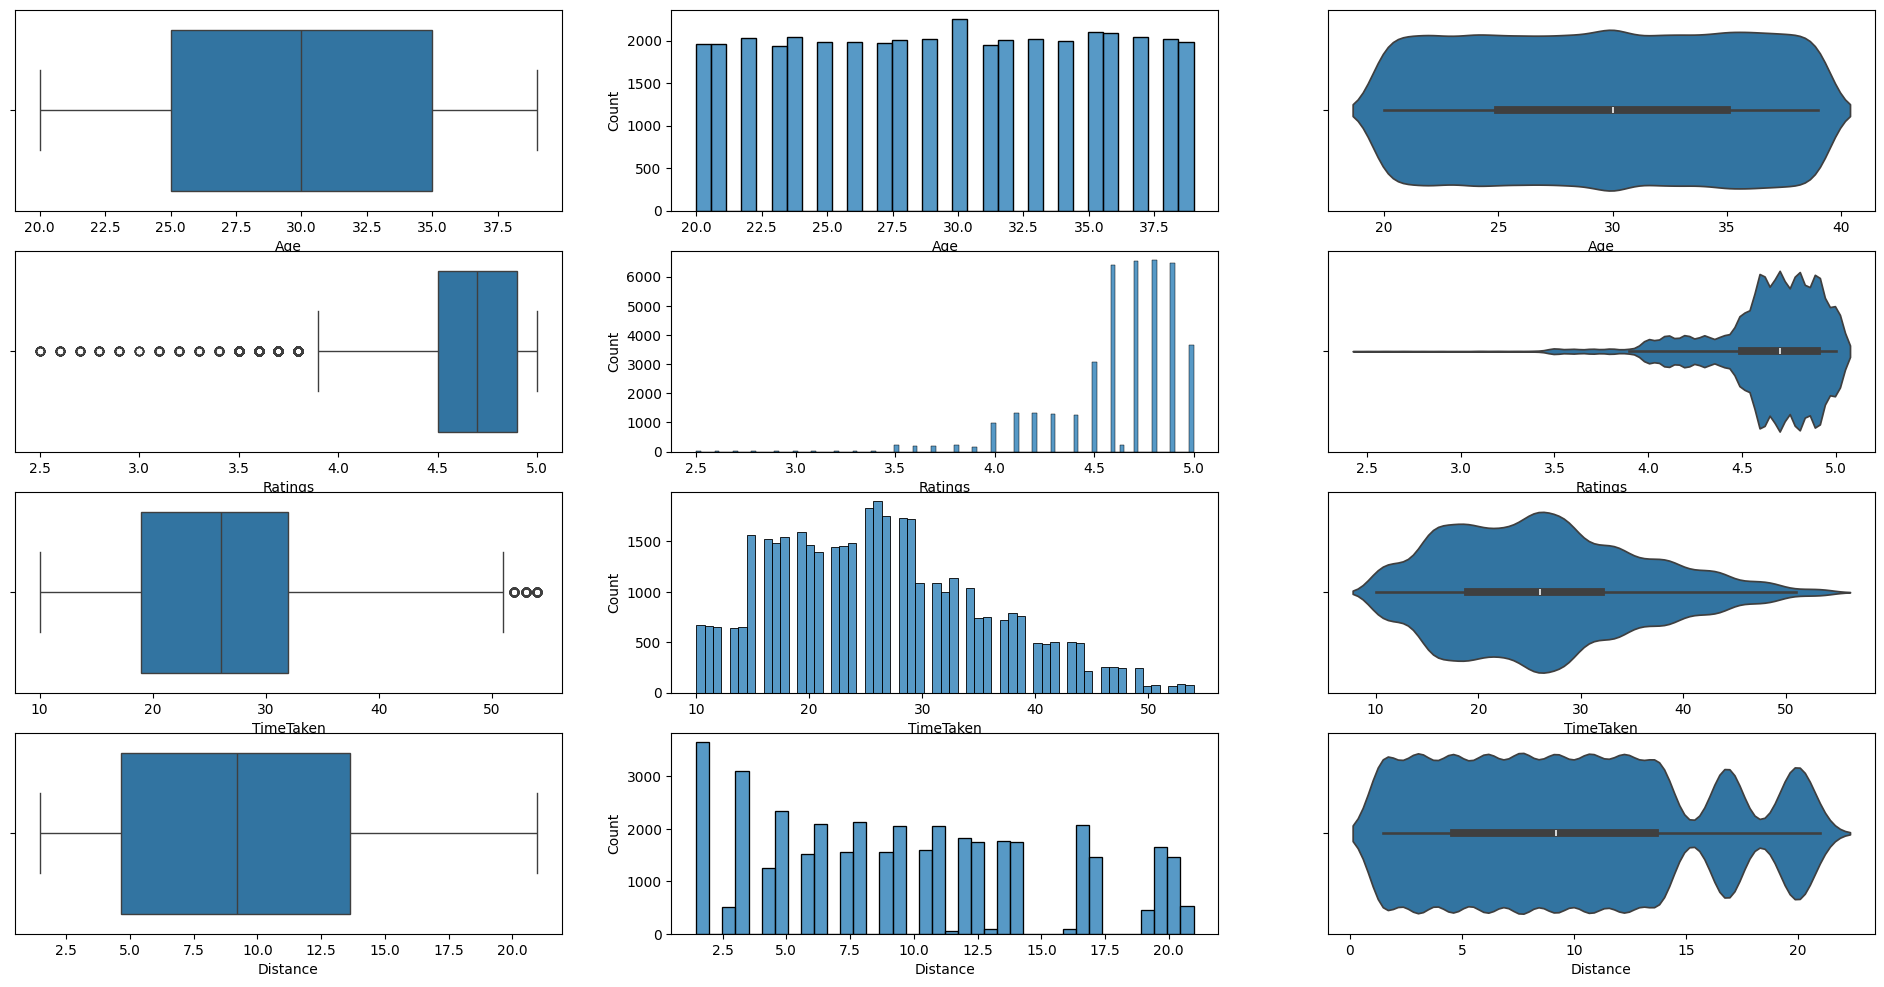

In [6]:
numeric = data[['Age', 'Ratings', 'TimeTaken', 'Distance']]
f, axes = plt.subplots(4, 3, figsize=(24, 12))

count = 0
for var in numeric:
    sb.boxplot(data = numeric[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric[var], ax = axes[count,1])
    sb.violinplot(data = numeric[var], orient = "h", ax = axes[count,2])
    count += 1

Even though there still remain some outliers the distribution is slightly better than before.

#### Using a heatamp, we will try to observe if there is any correlation between the numerical values

<Axes: >

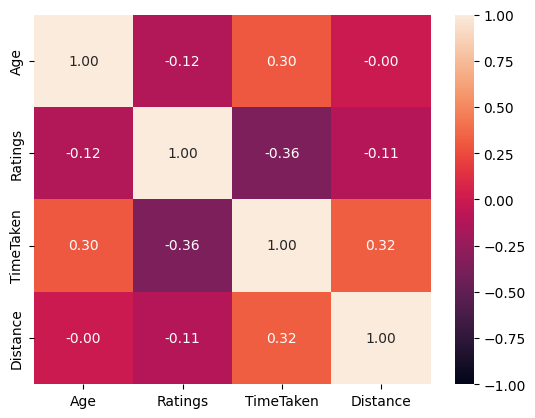

In [7]:
sb.heatmap(numeric.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

### Analysis of correlation matrix of numerical values
From the correlation matrix, we can observe that the overall correlation between variables are relatively low.

TimeTaken and Age is slightly correlated.

Similarly, TimeTaken and distance is also slightly correlated.

While Ratings has slight negative correalton with TimeTaken.

So we will look into Timetaken, Distance and Ratings

### EDA on catergorical Variables
Now we try to explore the categorical values with each numerical value to see if we can derive futher insights.

### Age

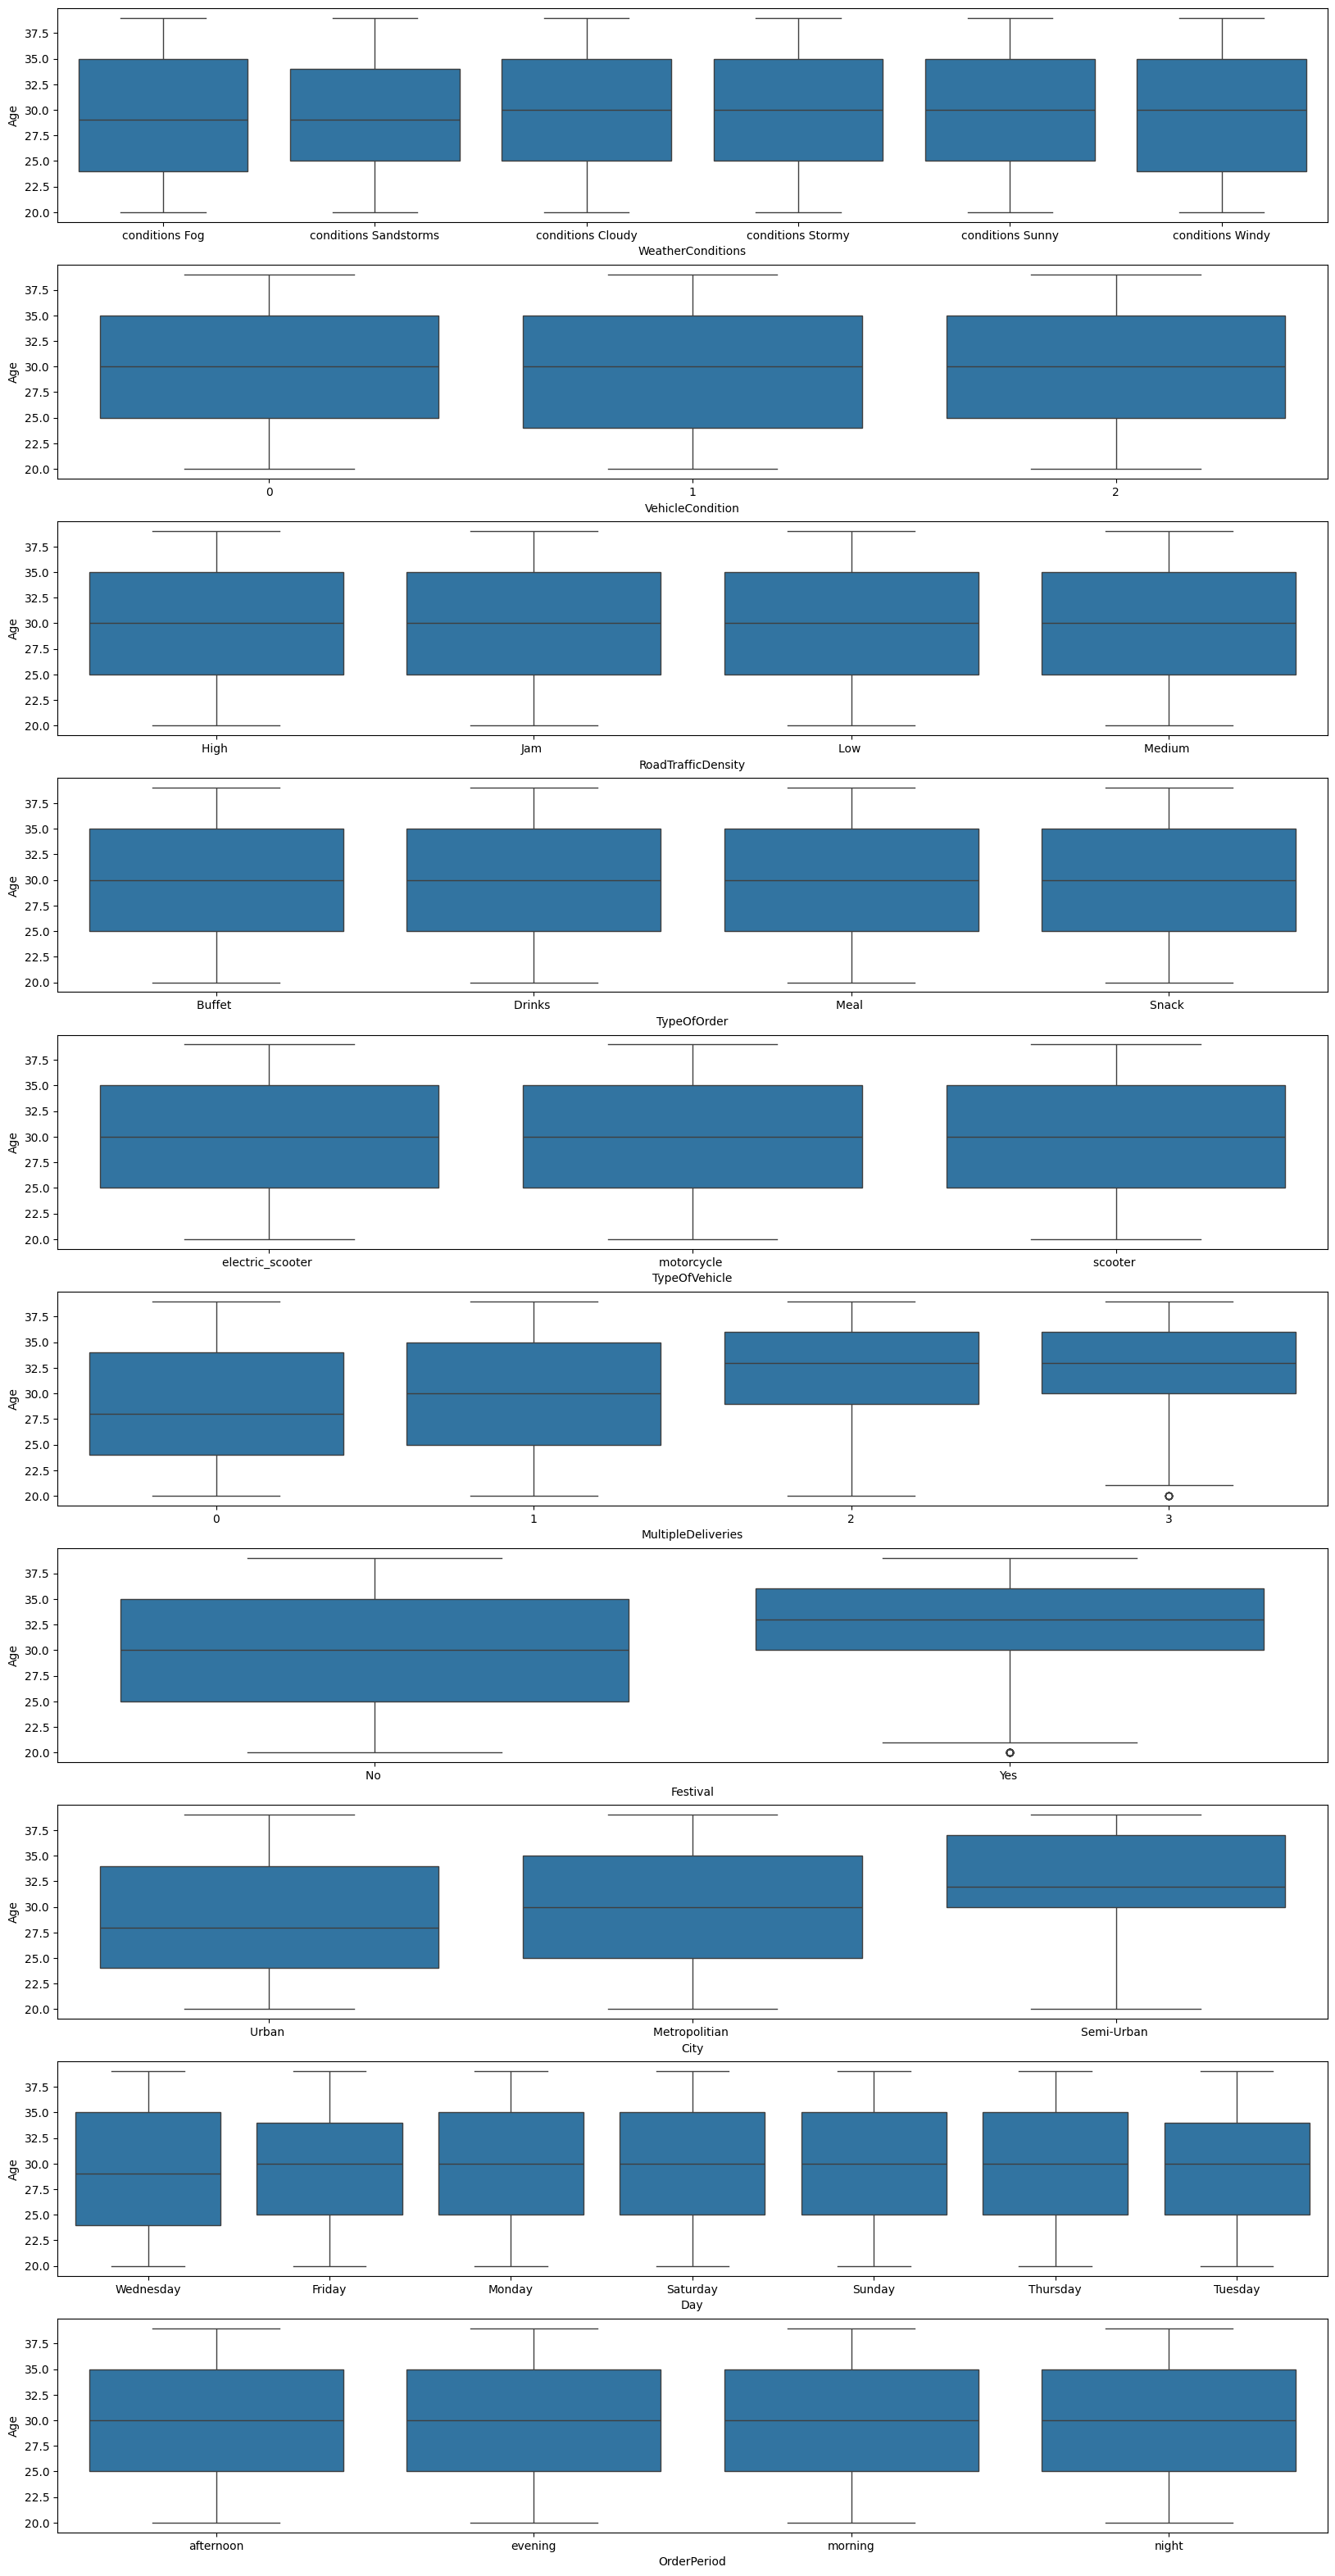

In [8]:
cat = data[['WeatherConditions', 'VehicleCondition','RoadTrafficDensity', 'TypeOfOrder', 'TypeOfVehicle', 'MultipleDeliveries', 'Festival', 'City', 'Day', 'OrderPeriod']]


count = 0
f, axes = plt.subplots(10, 1, figsize=(20,40))
for i,x in enumerate(cat):
    order = data.groupby(by=[x])['Age'].median().sort_values().index
    sb.boxplot(data=data, x=x, y='Age', ax = axes[count], order=order)
    count+=1

plt.show()

### Insights from comparing age to catergorical features
Here we observe that the range is same for all. We saw that those NaN values that we droped contained all of Delivery Riders aged 60 and above. We believe that those data are corrupted due large amount of data missing in the same row. Hence, it becomes hard to derive anything for age. However, we can still make slight observations.

1: The median of Age increases with the amount of MultipleDeliveries.

2: The median of Age is high on festival as compared to non festival day. 

3: We can see distinct median for City as well. With Urban having the lowest media age and Semi-Urban having the highest.


### Ratings

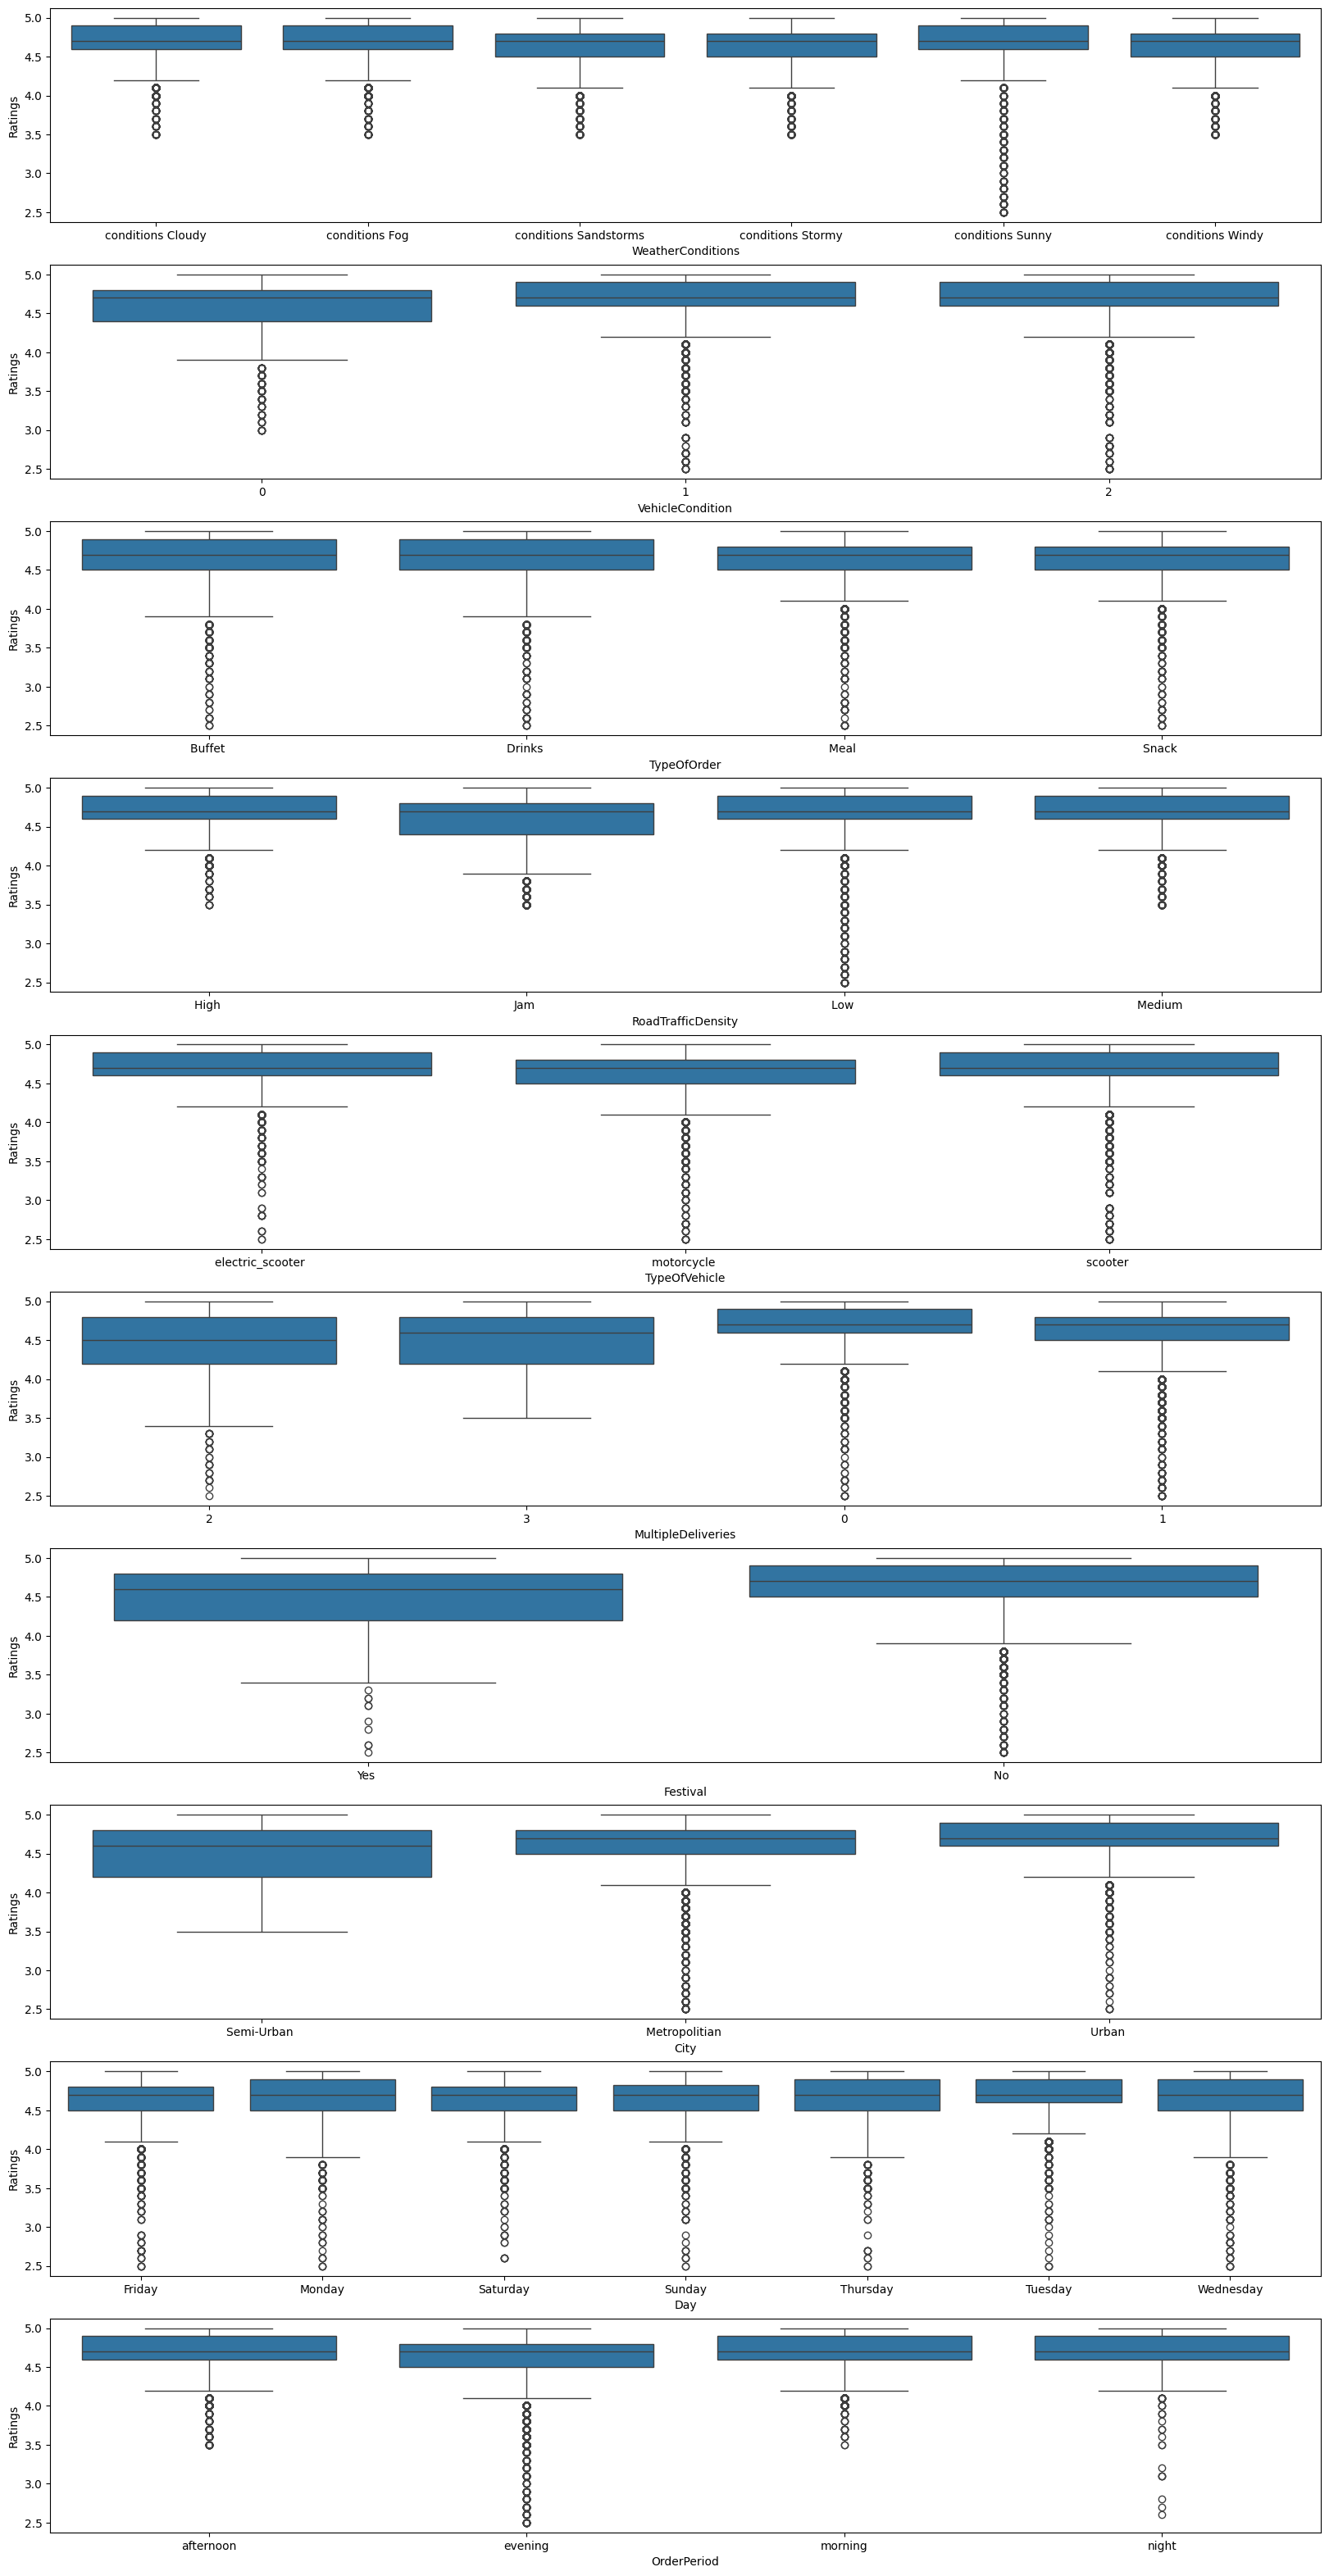

In [9]:
cat = data[['WeatherConditions', 'VehicleCondition', 'TypeOfOrder','RoadTrafficDensity' , 'TypeOfVehicle', 'MultipleDeliveries', 'Festival', 'City', 'Day', 'OrderPeriod']]


count = 0
f, axes = plt.subplots(10, 1, figsize=(20,40))
for i,x in enumerate(cat):
    order = data.groupby(by=[x])['Ratings'].median().sort_values().index
    sb.boxplot(data=data, x=x, y='Ratings', ax = axes[count], order=order)
    count+=1

plt.show()

### Insights from comparing Ratings to catergorical features
When comparing Ratings to Categorial features, there is more distinction between each category.

#### WeatherConditions:
The median accross all appears relatively similar, however the IQR seems slightly different. IQR are generally lower in Sandstorms, Stormy and Windy as compared to Cloudy, Fog and Sunny.

#### VehicleConditions: 
Similarly, median across all appear relatively similar. IQR Increases as VehicleCondition get better. Since Ratings and Delivery time are slightly negatively correlated. We hypothesys that perhaps a better conditioned vehicle is able to send a delivery in a shorter time. Resulting in a higher rating.

#### TypeOfOrder: 
Not much insights.

#### TypeOfVehicle:
Not much insights.

#### MultipleDeliveries: (maybe remove outliers)
Lesser MultipleDeliveries generally have a higher rating as compared to more MultipleDeliveries. Suprisingly, 1 MulitpleDelivery attained a higher median compared to 0 MultipleDelivery. However, the IQR is smaller in 0 MulitpleDelivery as compared to 1 MulitpleDelivery. Similarly, we hypothesise that having more concurt deliveries equates to futher distances and/or longer delivery time. Therefore, a lower rating.

#### Festival: (maybe remove outliers)
Ratings during non festival days seems to be on average higher than festival days. Again, perhaps during festival days, the delivery takes longer and/or distances are further.

#### City: (maybe remove outliers)
Ratings in Urban areas on average have a high Rating as comapred to semi-Urban and Metropolitian. Perhaps due to simialr reasons listed earlier.




### Timetaken

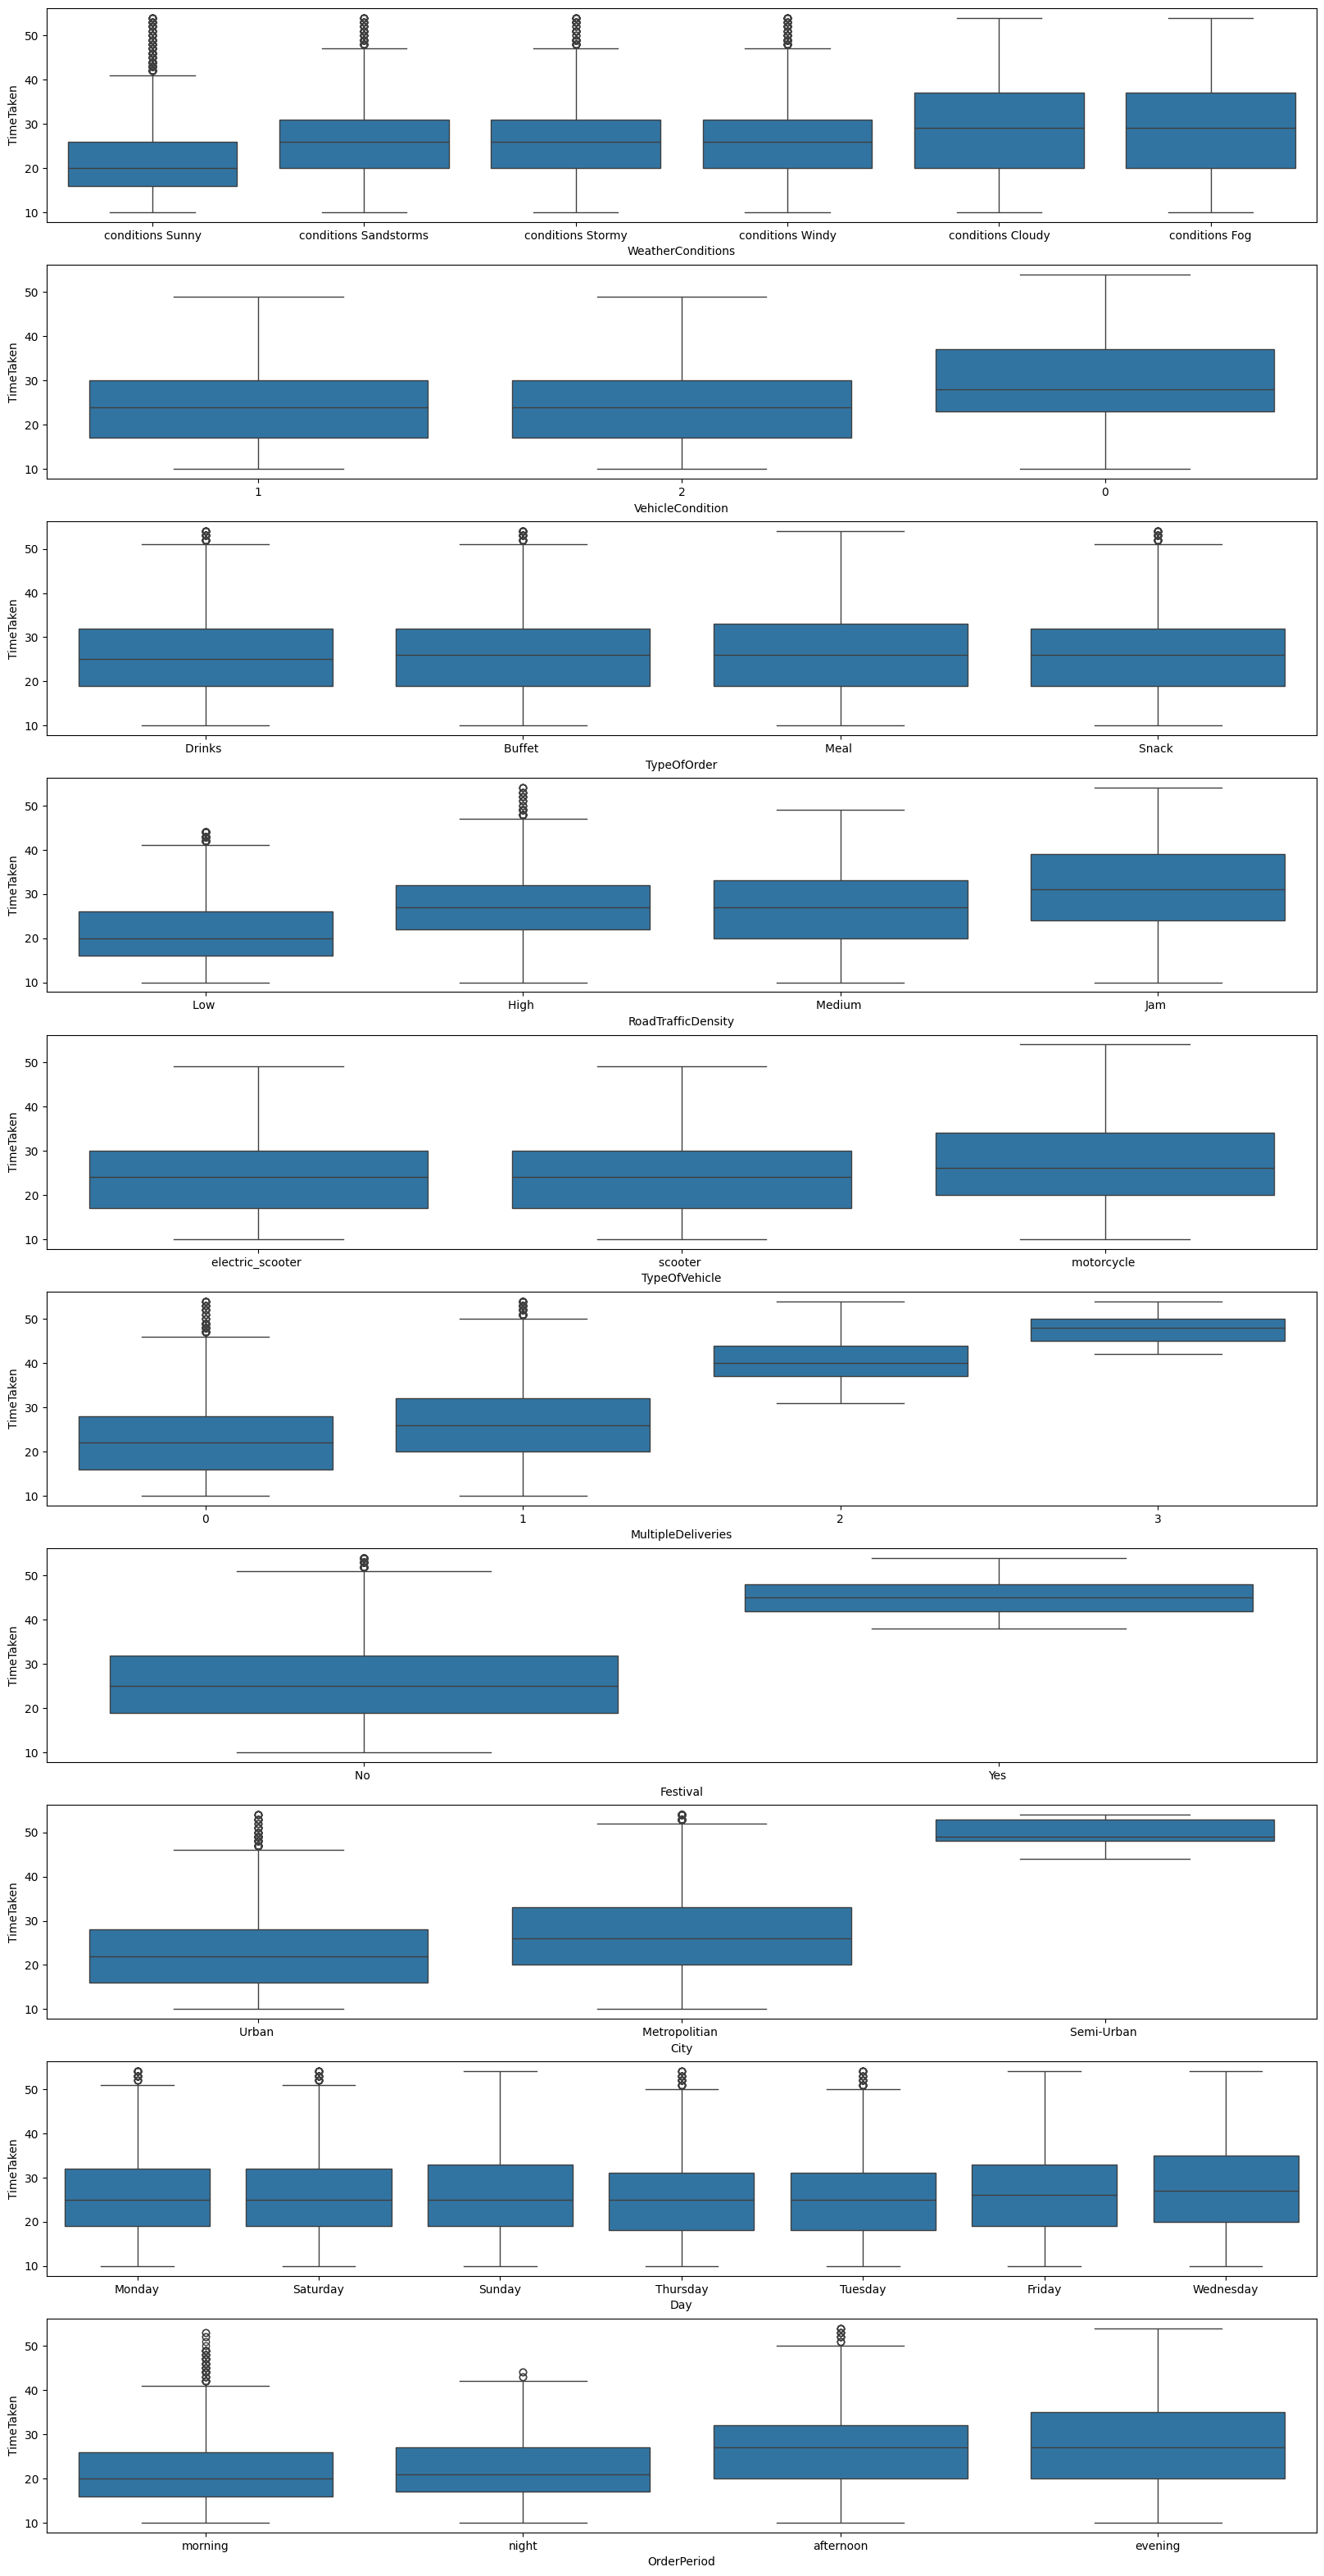

In [10]:
cat = data[['WeatherConditions', 'VehicleCondition', 'TypeOfOrder','RoadTrafficDensity' , 'TypeOfVehicle', 'MultipleDeliveries', 'Festival', 'City', 'Day', 'OrderPeriod']]


count = 0
f, axes = plt.subplots(10, 1, figsize=(20,40))
for i,x in enumerate(cat):
    order = data.groupby(by=[x])['TimeTaken'].median().sort_values().index
    sb.boxplot(data=data, x=x, y='TimeTaken', ax = axes[count], order=order)
    count+=1

plt.show()

### Insights from comparing TimeTaken to Catergorical Values

#### WeatherConditions: (maybe remove outliers)
During Sunny conditions, we can observe the most amout of outliers. We also observe multiple outliers from other conditions

#### VehicleCondition:
Unable to derive any insights

#### TypeOfOrder:
Unable to derive any insghts

#### RoadTrafficDensity:
From the visualisation, we can clearly observe that as the traffic condition worsens the time taken increases.

#### TypeOfVehicle:
Surpisingly motorcycle have the highest median. Perhaps motorcycle have deliveries that are futher, which concur with the correlation between timetaken and distance earlier. 

#### MultipleDeliveries: (maybe remove outliers)
We can distinctly see that the increase in MultipleDeliveries does result in long time taken on average. This confirms our previous hypothesis when comparing Ratings to Catergorical values.

#### Festival: (maybe remove outliers)
Again, we can distintly see that on festival dayas the time taken is higher than on non festival days. Which also confirms our previous hypothesis of lower ratings. 

#### City: (maybe remove outliers)
Again our hypothesis when comapring Ratings and categorical values are confirmed.

#### OrderPeriod: (maybe remove outliers)
Afternoon and Evening have a higher median.




### Distance

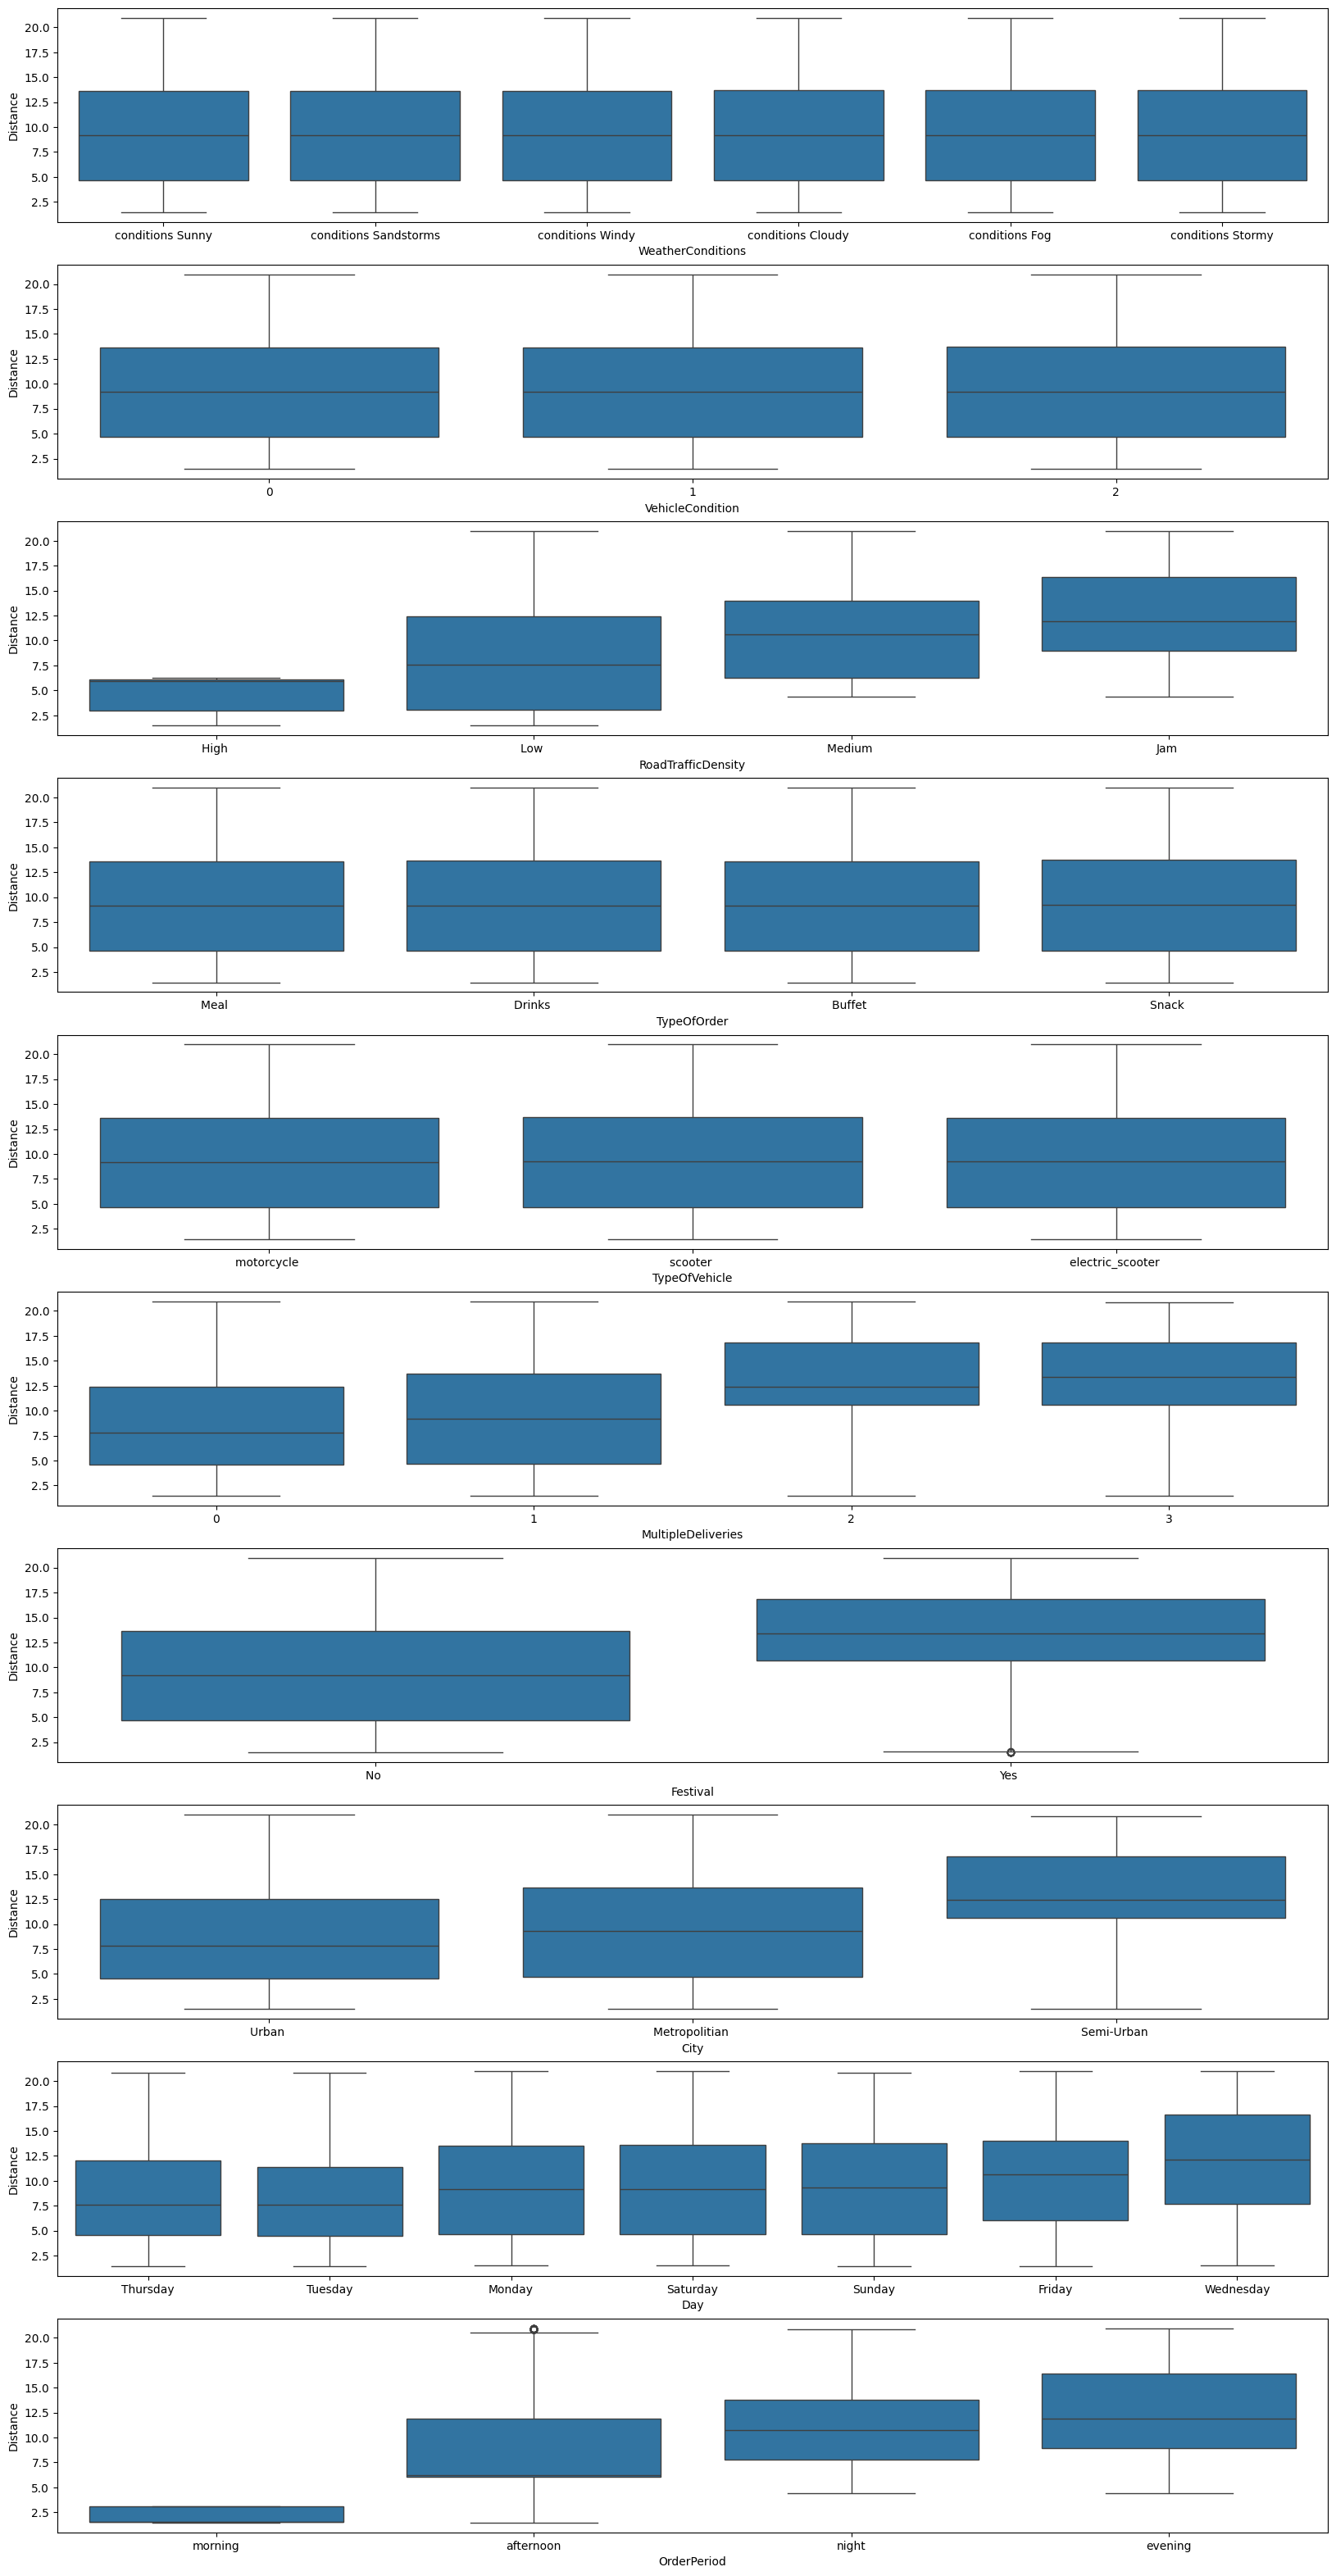

In [11]:
cat = data[['WeatherConditions', 'VehicleCondition','RoadTrafficDensity', 'TypeOfOrder', 'TypeOfVehicle', 'MultipleDeliveries', 'Festival', 'City', 'Day', 'OrderPeriod']]


count = 0
f, axes = plt.subplots(10, 1, figsize=(20,40))
for i,x in enumerate(cat):
    order = data.groupby(by=[x])['Distance'].median().sort_values().index
    sb.boxplot(data=data, x=x, y='Distance', ax = axes[count], order=order)
    count+=1

plt.show()

### Insights from comparing Distance to Catergorical Values

#### WeatherConditions, VehicleCondition, TypeOfOrder:
No insights.

#### RoadTrafficDensity:
We observed that each catergory has distint features. When RoadTrafficDensity is high, we observed that all data points are below median of all other category. And as the traffic condition worsens we observed that the median distance increases as well. Perhpas the algorithm of the delivery app is trying to reduce delivery time when the traffic is more dense by allocating delivery of shorter distance. When cross referencing to the comparison with TimeTaken, we find that perhaps the increase in delivery time is attributed to distance as well. Surpisingly, when the traffic is the worst at Jam the median distance is the highest.

#### TypeOfVehicle:
Previously, we hypothesys that motorcycle could have delivered futher distances. As we can see this is not the case, perhaps it is having multiple deliveries slowing down the delivery time.

#### MultipleDeliveries:
We observed that as the simulatneous delivery increases the distance increases and this is also the case TimeTaken. This 2 observation confirms our hypothesis on having more multipledeliveries resulting in a lower rating.

#### Festival:
We observed that the range for both Yes and No for festival are similar. However, the median distance is higher on festival days, which also concurs with the 2 previous observation when comparing to Ratings and Timetaken.

#### City:
The observation further confirm our hypothesis.

### Removal of outliers observed from above visualisation
Similarly we remove the outliers and store it in another dataframe. Then we will compare machine learning results to see if the results improves after removing outerliers

In [12]:
def remove_outliers_by_category(df, category_column, numeric_column, category_value, threshold=3):
    # Create a copy of the data to avoid modifying the original DataFrame
    category_data = df.copy()
    category_data = category_data[category_data[category_column] == category_value]
    category_data['Z_score'] = (category_data[numeric_column] - category_data[numeric_column].mean()) / category_data[numeric_column].std()
    category_filtered = category_data[(category_data['Z_score'] <= threshold) & (category_data['Z_score'] >= -threshold)]
    # Concatenate filtered data with original data where 'festival' is not equal to the specified value
    filtered_df = pd.concat([category_filtered, df[df[category_column] != category_value]])
    return filtered_df

In [13]:
parameters_to_loop = [
    ('Festival', 'Ratings', 'No'),  
    ('MultipleDeliveries', 'Ratings', 0), 
    ('City', 'Ratings', 'Urban'),
    ('OrderPeriod', 'Ratings', 'evening'),
    ('OrderPeriod', 'Ratings', 'afternoon'),
    ('WeatherConditions', 'TimeTaken', 'conditions Sunny'),
    ('MultipleDeliveries', 'TimeTaken', 0), 
    ('Festival', 'TimeTaken', 'No'),  
    ('City', 'TimeTaken', 'Urban'),
    ('OrderPeriod', 'TimeTaken', 'evening'),
    ('OrderPeriod', 'Distance', 'afternoon')
]

In [14]:
for params in parameters_to_loop:
    category_column, numeric_column, category_value = params
    # Execute the function with the current parameter set
    data2 = remove_outliers_by_category(data2, category_column, numeric_column, category_value)
    

### Now we want to make futher observation with catergorical variables that had interesting results earlier

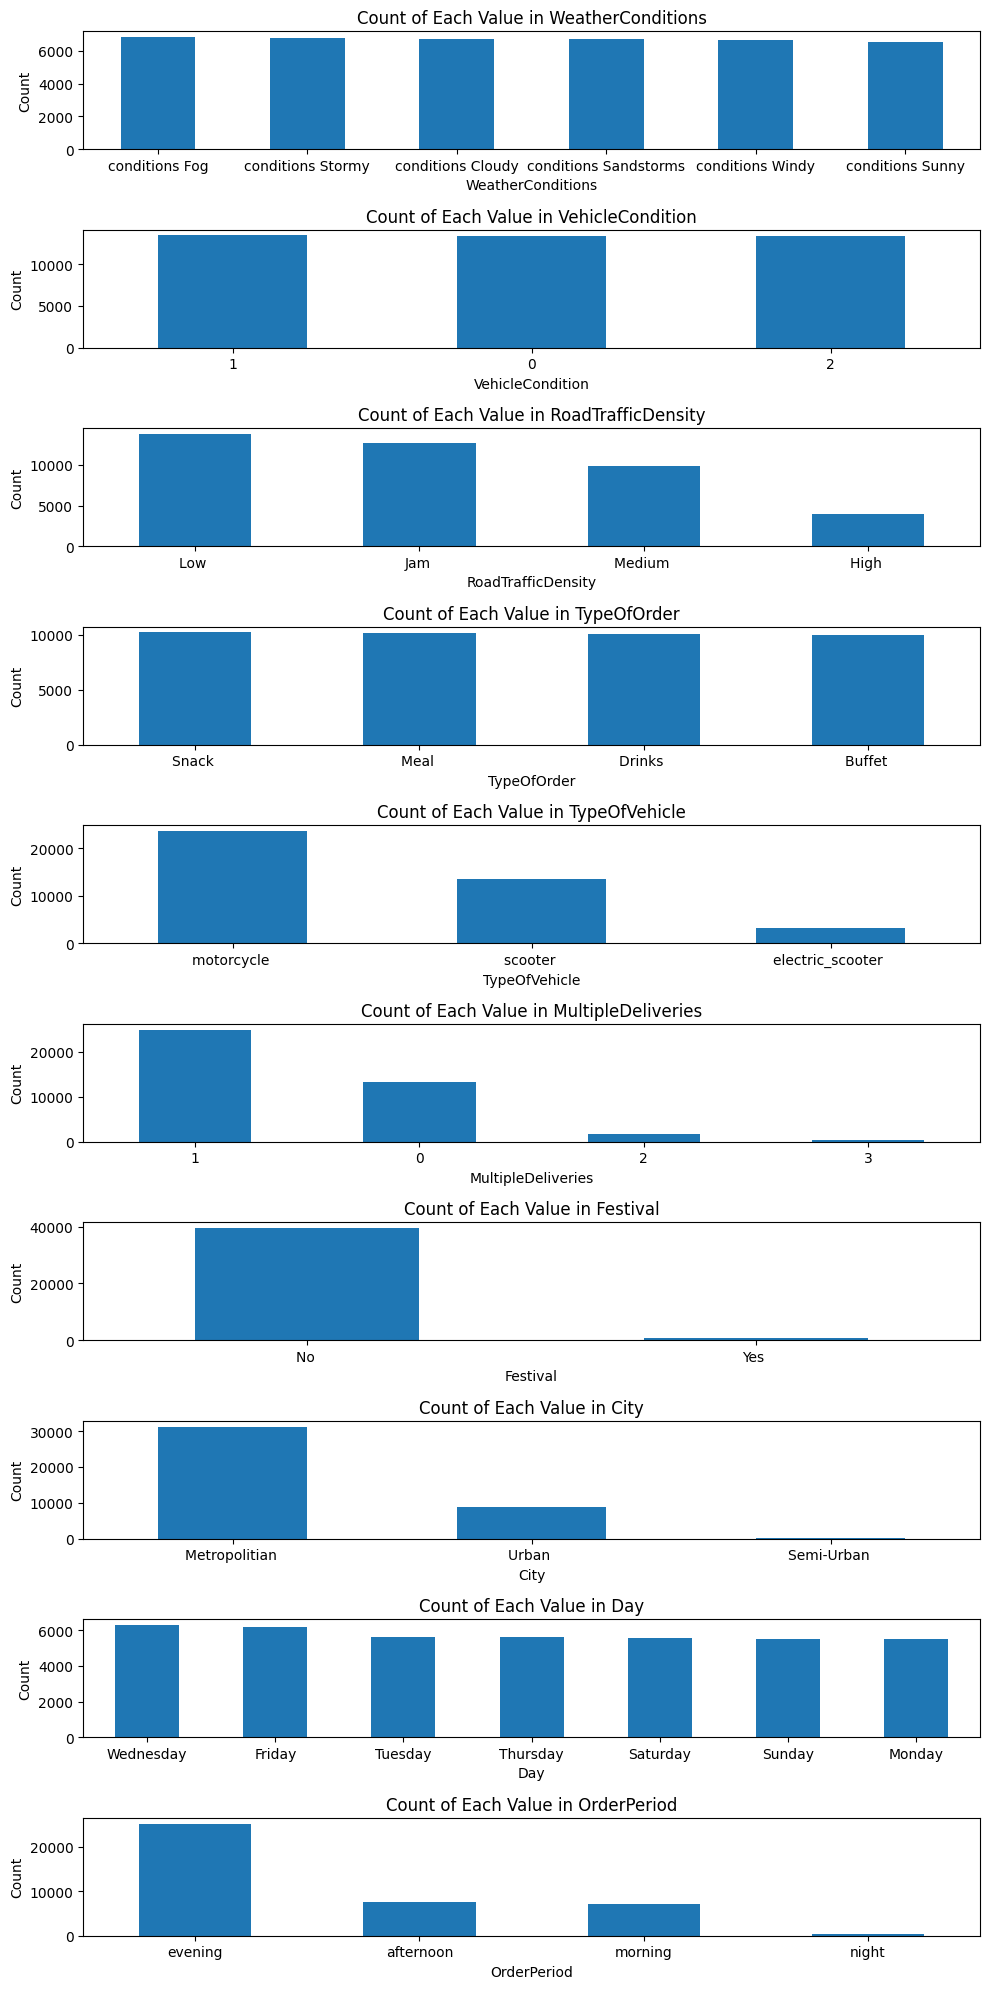

In [15]:
# Create subplots
fig, axes = plt.subplots(10, 1, figsize=(10, 20))
cat = data[['WeatherConditions', 'VehicleCondition', 'RoadTrafficDensity', 'TypeOfOrder', 'TypeOfVehicle', 'MultipleDeliveries', 'Festival', 'City', 'Day', 'OrderPeriod']]


# Plot each categorical column
for i, col in enumerate(cat.columns):
    value_counts = cat[col].value_counts()
    ax = axes[i]
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title('Count of Each Value in {}'.format(col))
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Observation of countplot:

### WeatherCoditions, VehicleConditions, TypeOfOrder:
The distribution of WeatherConditions is evenly ditributed.

### RoadTrafficDensity:
Low and Jam contributes to majority of the data. This means that most deliveries are made when the traffic is the either at its  best or the worst.  

### TypeOfVehicle:
Most deliveries are made using motorcycles, with eletric_scooter being the least

### MultipleDeliveries:
Most deliveries are done concurently with 1 addtional delivery having the highest count. Only a very less percentage or deliveries are made with 2 and 3 addtional deliveries. 

### Festival: 
Most deliveries are made on Non-Festival dates 

### City:
Most of the delivery data are from Metropolitian. Semi-Urban has the least amount of delivery data.

### Day:
Deliveries made each day are relatively even with Wednesday seeing the highest amount of deliveries and Monday seeing the least.

### Orderperiod:
Most Deliveries are made during the evening. Deliveries made in the afternoon and morning are relatively simlar with night seeing the least amount of deliveries.

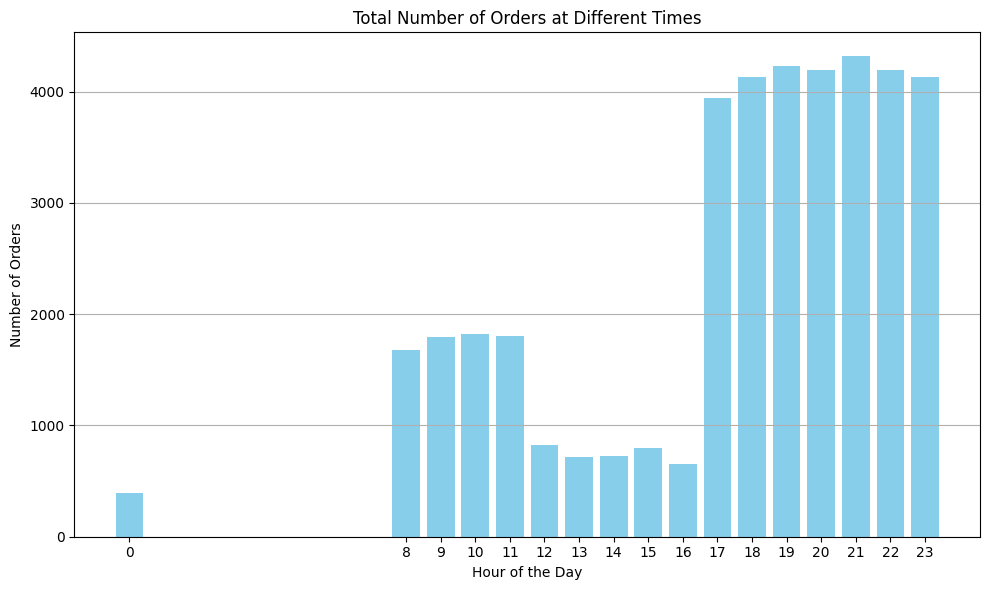

In [16]:
OrderCount = data[['Hour']].copy()
order_count_by_hour = OrderCount.groupby('Hour').size().reset_index(name='OrderCount')

plt.figure(figsize=(10, 6))
plt.bar(order_count_by_hour['Hour'], order_count_by_hour['OrderCount'], color='skyblue')
plt.title('Total Number of Orders at Different Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(order_count_by_hour['Hour'])
plt.grid(axis='y')  # Add grid lines only on y-axis
plt.tight_layout()
plt.show()

### Time-series against Number of Orders:
We observed that there are no deliveries made between 01:00 to 08:00. There are more deliveries being made between 08:00 to 11:00 than 12:00 to 16:00. Most deliveries are made during 17:00 to 00:00. This visualisation helps us to see the peak periods through out the day. We see that there is a small peak during the morning before 12:00 and a peak period betwwen after 17:00.

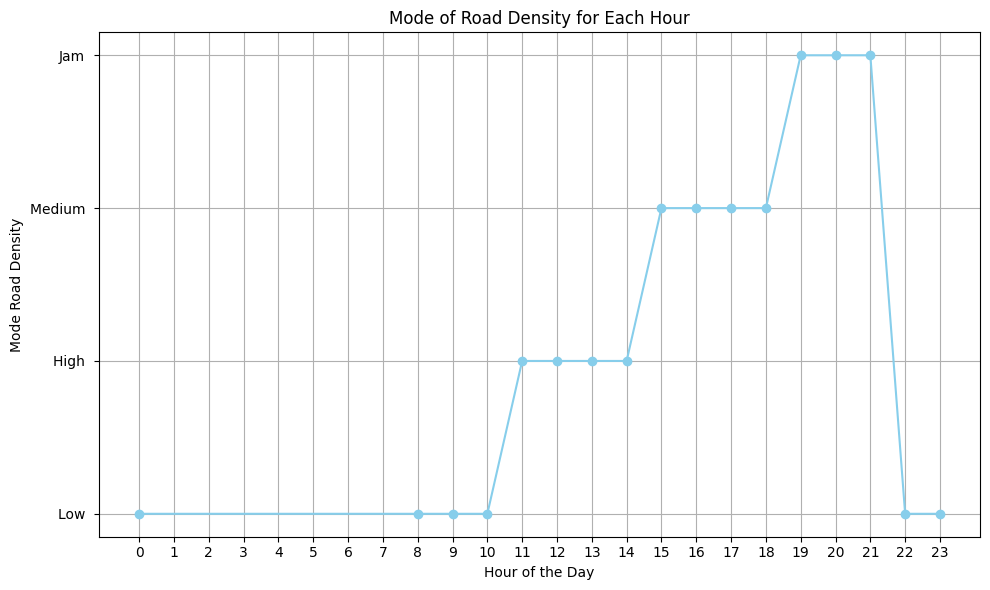

In [17]:
# Calculate the mode of 'RoadTrafficDensity' for each hour
mode_by_hour = data.groupby('Hour')['RoadTrafficDensity'].apply(lambda x: x.mode()[0]).reset_index(name='ModeRoadTrafficDensity')

# Plotting the mode of road density for each hour
plt.figure(figsize=(10, 6))
plt.plot(mode_by_hour['Hour'], mode_by_hour['ModeRoadTrafficDensity'], marker='o', color='skyblue', linestyle='-')
plt.title('Mode of Road Density for Each Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mode Road Density')

# Set x-axis ticks to show every hour
plt.xticks(np.arange(24))  # Set ticks from 0 to 23
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()

### Time-Series against average TimeTaken and RoadTrafficDensity:
We observed that in general, as the traffic condition worsens, the average time taken increases. However, between 14:00 to 19:00 despite the worsening of road conditions, the ave devliery time decreased. Possibly, the decrease in order attributed to the decrease in average delivery time.

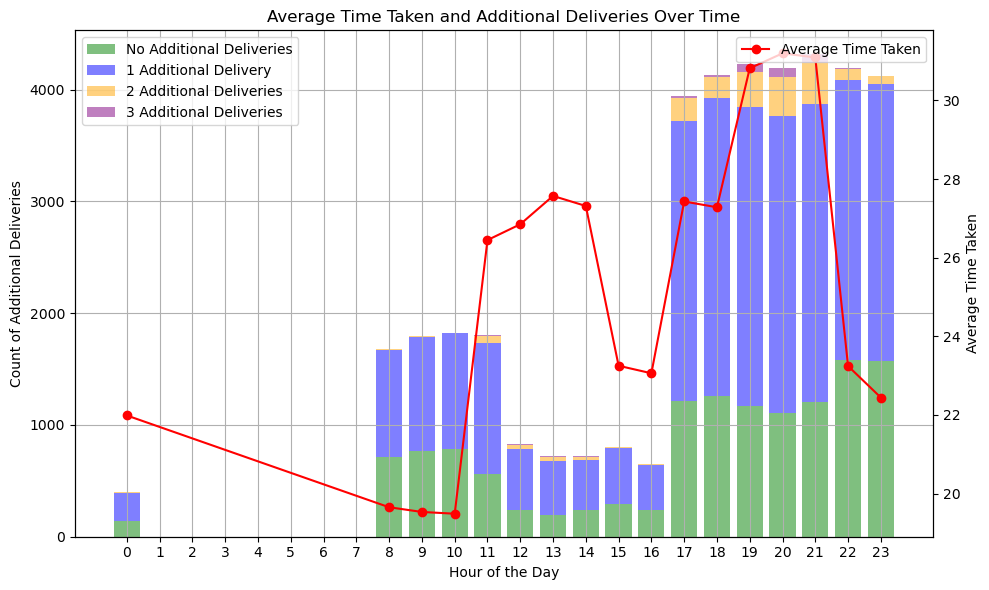

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Group by hour and calculate the average time taken for deliveries
avg_time_by_hour = data.groupby('Hour')['TimeTaken'].mean().reset_index(name='AvgTimeTaken')

# Group by hour and calculate the count of MultipleDeliveries for each value (0, 1, 2, 3)
delivery_count_by_hour = data.groupby(['Hour', 'MultipleDeliveries']).size().unstack(fill_value=0).reset_index()

# Plotting the average time taken and delivery count as a time series
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot vertical bars for count of MultipleDeliveries
ax1.bar(delivery_count_by_hour['Hour'], delivery_count_by_hour[0], color='green', alpha=0.5, label='No Additional Deliveries')
ax1.bar(delivery_count_by_hour['Hour'], delivery_count_by_hour[1], bottom=delivery_count_by_hour[0], color='blue', alpha=0.5, label='1 Additional Delivery')
ax1.bar(delivery_count_by_hour['Hour'], delivery_count_by_hour[2], bottom=delivery_count_by_hour[0]+delivery_count_by_hour[1], color='orange', alpha=0.5, label='2 Additional Deliveries')
ax1.bar(delivery_count_by_hour['Hour'], delivery_count_by_hour[3], bottom=delivery_count_by_hour[0]+delivery_count_by_hour[1]+delivery_count_by_hour[2], color='purple', alpha=0.5, label='3 Additional Deliveries')

# Set labels and title for the first y-axis
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Count of Additional Deliveries')
ax1.set_xticks(np.arange(24))  # Show all hours in x-axis
ax1.legend(loc='upper left')

# Plot the average time taken without normalization
ax2 = ax1.twinx()
ax2.plot(avg_time_by_hour['Hour'], avg_time_by_hour['AvgTimeTaken'], marker='o', color='red', label='Average Time Taken')
ax2.set_ylabel('Average Time Taken')
ax2.legend(loc='upper right')
# Add grid lines
ax1.grid(True)
ax2.grid(False)

plt.title('Average Time Taken and Additional Deliveries Over Time')
plt.tight_layout()
plt.show()


### Time-Series with MultipleDeliveries:
08:00 to 10:00: This time period sees the least average time taken. Most deliveries are made with no additional data or with 1 additional delivery.

11:00: During this house we see an increase in average time taken. We also observe an increase in more addtional deliveries. 

12:00 to 14:00: We observe a decrease in order. However, the average time taken remains high. The percentage of of additional delivery is greater than individual orders. 

14:00 to 16:00: We observe the number or orders remains relatively similar yet the average time taken has reduced significantly. The number of MultipleDeliveries also reduced. 

17:00 to 18:00: The number of orders and average TimeTaken increased significantly. A large propotion of the deliveries are made concurrently. 

19:00 to 21:00: We see an increse in average delivery time and MultipleDeliveries.

22:00 to 23:00: We see a decrease in delivery time taken despite the number or orders remaining simlar. There has also been a decrease in high range of MultipleDeliveries. 

### Conclusion from EDA

### 1. Numerical Features
    i. We observe low correlation between across Numerical values. Therefore using linear regression may not be optimal in predicting delivery time.
    ii. We observe that there is some skewness in Ratings and TimeTaken. Therefore we will generate another dataframe that remove the outliers. 

### 2. Categorical
    i. We observe a number of categorical feature that are of interest in predicting TimeTaken.
        a. RoadTrafficDensity 
        b. MultipleDeliveries 
        c. Festival - However, 'No'count greatly covers 'Yes' count. Therefore, it would not be ideal to use this feature.
        d. OrderPeiord
        e. City - Similarly, 'Metropolitian' count greatly cover other values. Therefore, it would not be ideal to use this feature
        
    ii. We observed several outliers in the data. Therefore we will generate another dataframe that remove the outliers.
    
### 3.Time-Series
    i. We see that TimeTaken is greatly influence by several factors:
        a. MultipleDelivery
    We see that despite number of orders and traffic remain the same, the TimeTaken significantly incresae when there is an increase in MultipleDeliveries. When the supply of delivery rider is unable to match the demand generated by the orders, each delivery rider's MultipleDeliveries will increase. Significantly increasing TimeTaken. 
    
        b. Traffic Density
    Despite seeing similar number of orders, the decrease in traffic density decrease TimeTaken for delivery to be completed. 
    
       c. For consumers, Avoid lunch peak hour from 11:00 - 14:00. Avoid dinner peak hour 19:00 - 21:00. 
       d. For delivery rider, to maximise delivery made, consider working from 11:00 - 14:00 and 17:00 - 23:00.
       e. For restuarants, to improve preperation time while reducing cost, consider hiring more staff to cover shift from 09:00 to 11:00 and 05:00 - 23:00. 
            


#### This file contains data with outlier removed

In [19]:
data2 = data2.drop('Z_score', axis=1)
data2.to_csv(r'train_cleaned_imputed_no_outlier.csv', index=False)

#### This file contains data with the selected columns (WITH outliers)

In [20]:
data3 = data[
    [
        "Age",
        "Ratings",
        "MultipleDeliveries",
        "RoadTrafficDensity",
        "TimeTaken",
        "Distance",
    ]
].copy()

In [21]:
data3.to_csv(r'train_cleaned_imputed_selcol.csv', index=False)

#### This file contains data with the selected columns (WITHOUT outliers)

In [22]:
data4 = data2[
    [
        "Age",
        "Ratings",
        "MultipleDeliveries",
        "RoadTrafficDensity",
        "TimeTaken",
        "Distance",
    ]
].copy()
data4.to_csv(r"train_cleaned_imputed_no_outlier_selcol.csv", index=False)